### Import Dataset

In [1]:
from dataset.GvaDataset import GvaDataset
from torch.utils.data import random_split, DataLoader
from torchvision.transforms import v2
import os
import random
random.seed(137)

from dataset.transforms import *

from dotenv import load_dotenv
load_dotenv()

PROJECT_DIR = os.getenv('PROJECT_DIR')


train_transforms = [
    Resize((1024, 512)),
    HorizontalFlip(p=0.5),
    VerticalFlip(p=0.5),
    Affine(0.2, 0.2, [-10, 10]),
    Jitter(),
]

test_transforms = [Resize((1024, 512))]


train_images_path = os.path.join(PROJECT_DIR, "image_processing/data/images/train")
train_labels_path = os.path.join(PROJECT_DIR, "image_processing/data/labels/train")

test_images_path = os.path.join(PROJECT_DIR, "image_processing/data/images/test")
test_labels_path = os.path.join(PROJECT_DIR, "image_processing/data/labels/test")


train_dataset = GvaDataset(train_images_path, train_labels_path, transforms=train_transforms)
test_dataset = GvaDataset(test_images_path, test_labels_path, transforms=test_transforms)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

### Model-2

In [3]:
from experiment import Experiment
experiment = Experiment(device='cpu')
weights_path = os.path.join(PROJECT_DIR, "image_processing/weights/model-2/8000.pkl")
experiment.load_experiment(weights_path)

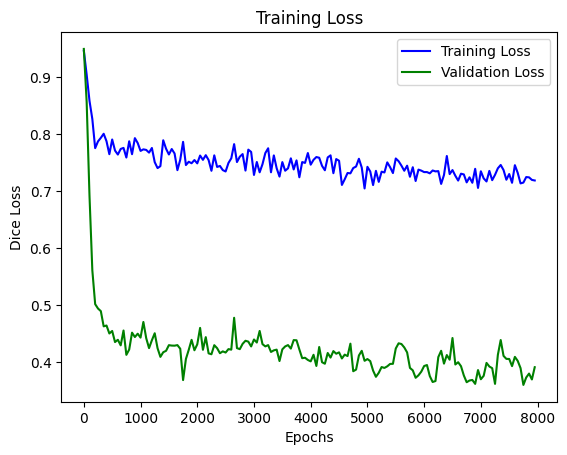

In [5]:
experiment.plot_loss(k=50)

c:\Users\chris\anaconda3\envs\gva\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


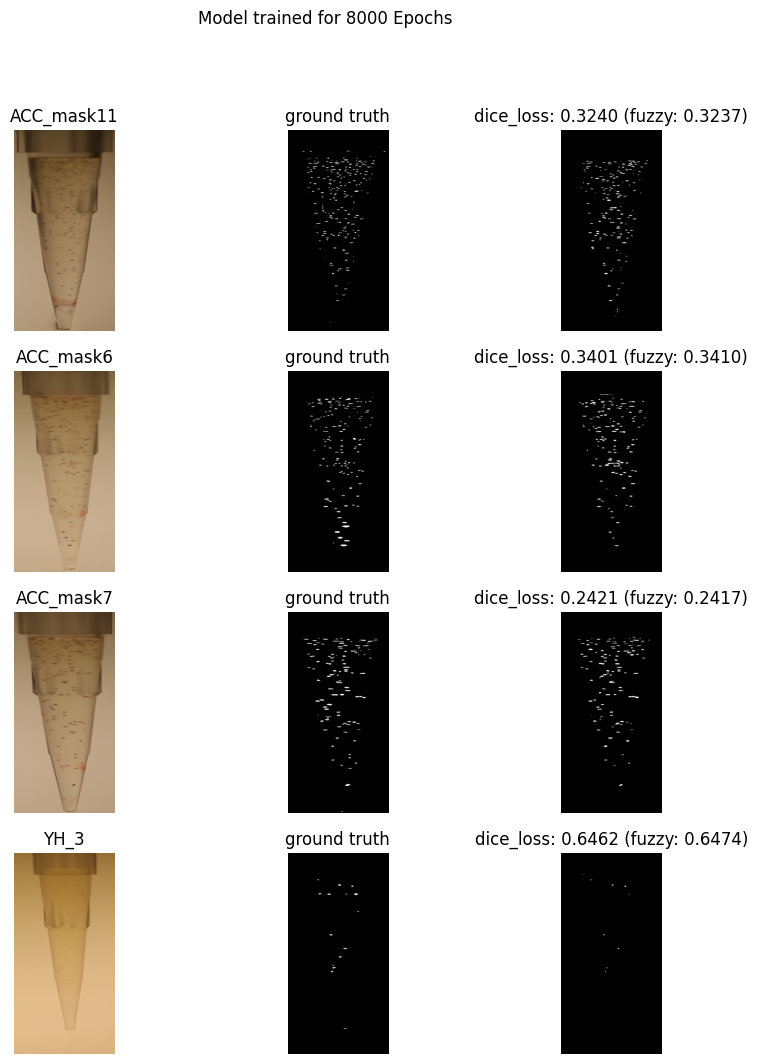

In [3]:
experiment.qualitative_eval(test_dataset)

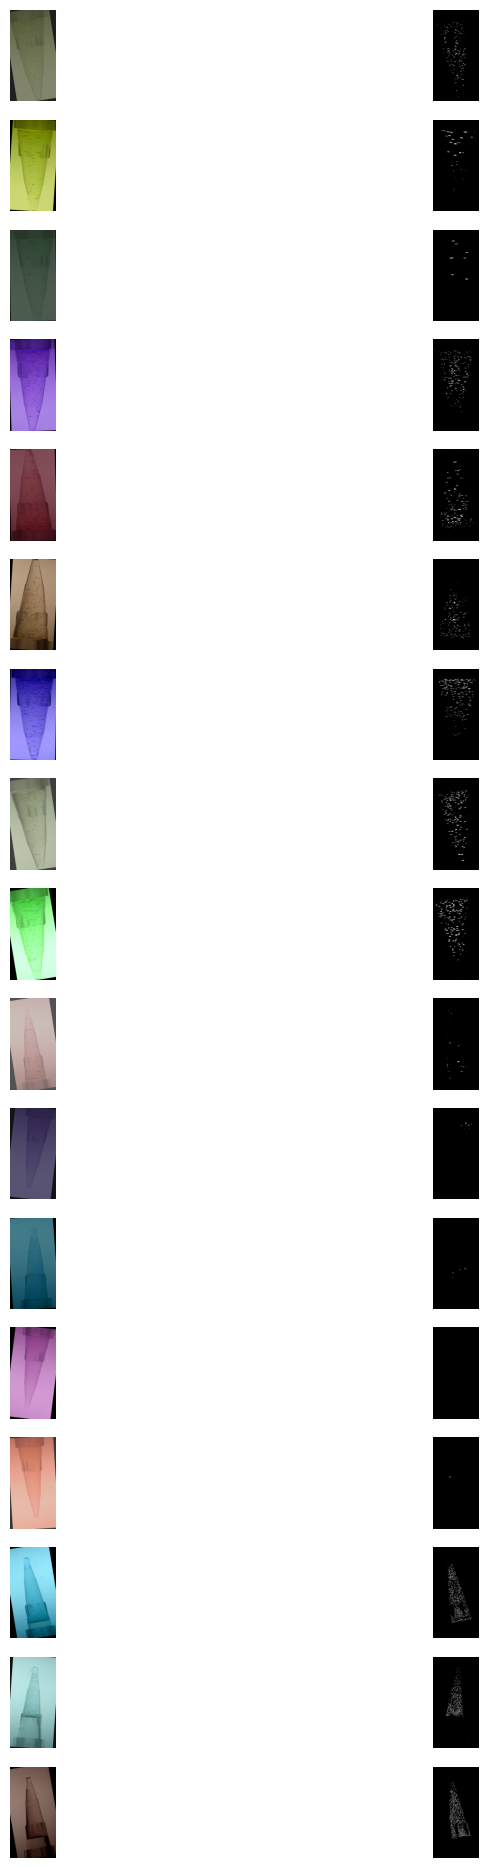

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(len(train_dataset), 2, figsize=(10, 24))

for i in range(len(train_dataset)):
    img, lab, file = train_dataset[i]
    img = img.permute(1, 2, 0)
    ax[i, 0].imshow(img)
    ax[i, 0].axis('off')
    ax[i, 1].imshow(lab, cmap='gray')
    ax[i, 1].axis('off')
    

### Model 4